In [27]:
# Calculates significance of difference between groups
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.stats import shapiro
plt.style.use('dark_background')

experiment_name = 'Task2'
if not os.path.exists('Stats'):
    os.mkdir(experiment_name + '/Stats')
    
# loading the data
with open(experiment_name + '/amplitudes_sep.p', 'rb') as f:
    amplitudes_sep = pickle.load(f)

with open(experiment_name + '/areas_sep.p', 'rb') as f:
    areas_sep = pickle.load(f)

with open(experiment_name + '/half_widths_sep.p', 'rb') as f:
    half_widths_sep = pickle.load(f)


In [28]:
amps = pd.DataFrame(dict([ (k, pd.Series(v)) for k, v in amplitudes_sep.items() ]))
areas = pd.DataFrame(dict([ (k, pd.Series(v)) for k, v in areas_sep.items() ]))
hws = pd.DataFrame(dict([ (k, pd.Series(v)) for k, v in half_widths_sep.items() ]))

In [29]:
amps.head(6)

,Cheler,Oxyt,Oxyt+Cheler,control
0,0.012495,0.133895,0.145073,0.017661
1,0.015751,0.137304,0.087468,0.066615
2,-0.000839,0.115264,0.117592,0.070702
3,0.030832,0.152381,0.084334,0.093066
4,0.031840,0.143440,0.128579,0.100169
5,0.019011,0.150789,0.102521,0.105181


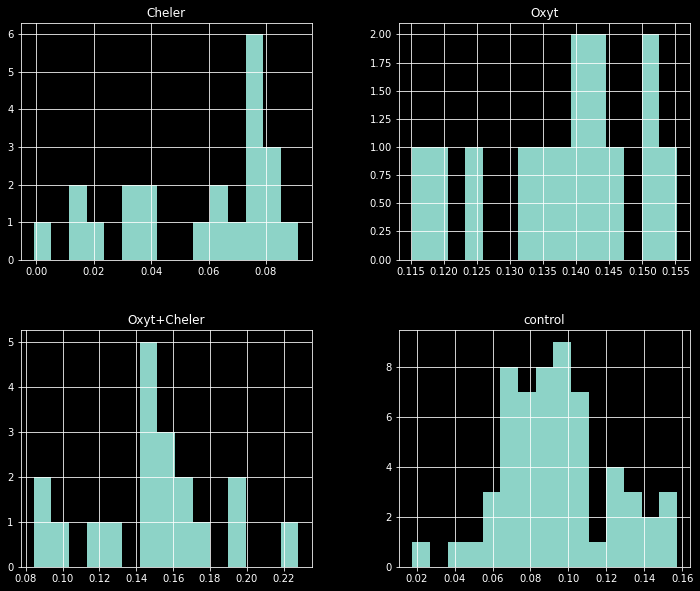

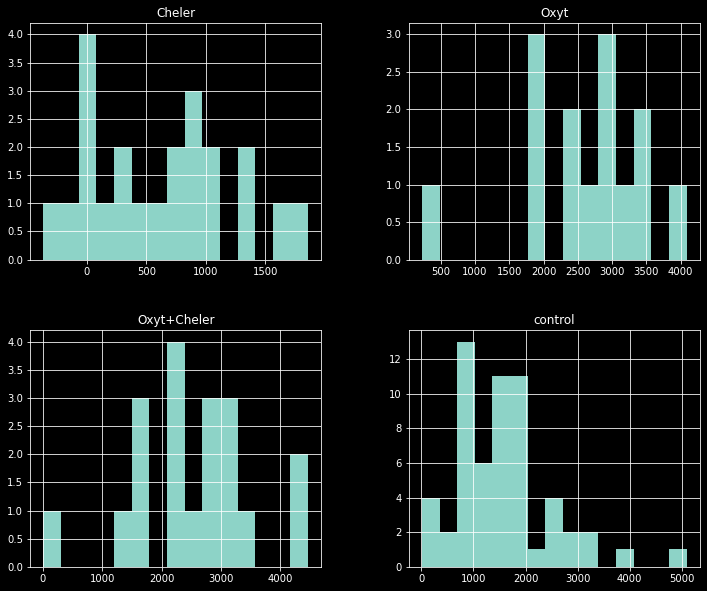

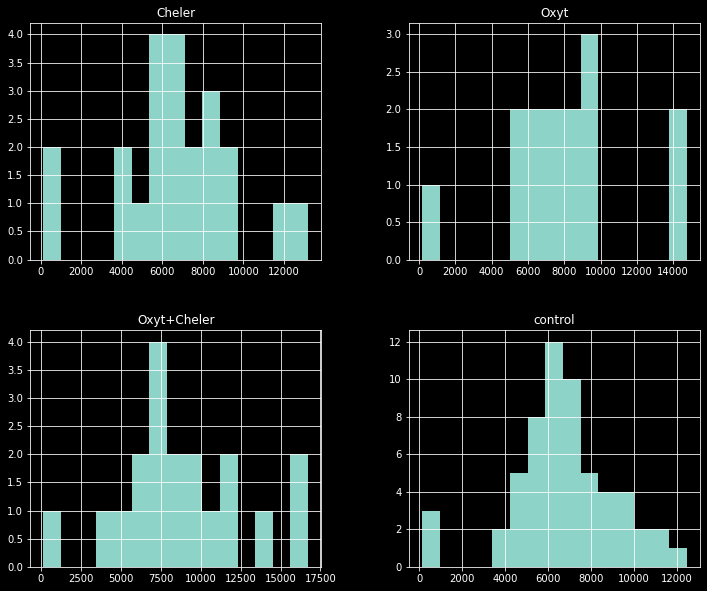

In [30]:
hist = amps.hist(bins=15, figsize=(12,10));
plt.savefig(experiment_name + '/Stats/histograms_amps.pdf')

hist = areas.hist(bins=15, figsize=(12,10));
plt.savefig(experiment_name + '/Stats/histograms_areas.pdf')

hist = hws.hist(bins=15, figsize=(12,10));
plt.savefig(experiment_name + '/Stats/histograms_hws.pdf')

In [34]:
from scipy.stats import ttest_rel

In [37]:
for k, v in amplitudes_sep.items():
    sample = np.array(v)
    sample = sample[ np.logical_not(np.isnan(sample)) ]
    shapiro_res = shapiro(sample)        

In [42]:
print([len(v) for v in amplitudes_sep.values()])

[22, 14, 19, 58]


In [64]:
keys = list(amplitudes_sep.keys())
vals = amplitudes_sep.values()
p_values = []
mv = min([len(v) for v in vals])
for i in range(len(keys)):
    for j in range(i+1, len(keys)):
        p_values.append( (str(keys[i]), str(keys[j]), ttest_rel(amplitudes_sep[keys[i]][:mv], amplitudes_sep[keys[j]][:mv])[1]))
print(p_values)

[('Cheler', 'Oxyt', 2.990347423923769e-08), ('Cheler', 'Oxyt+Cheler', 9.303323287642464e-10), ('Cheler', 'control', 2.333854350442826e-05), ('Oxyt', 'Oxyt+Cheler', 0.870533451792033), ('Oxyt', 'control', 1.3209708844000805e-06), ('Oxyt+Cheler', 'control', 0.00032859069188189224)]


In [69]:
pval_df = pd.DataFrame(columns=keys, index=keys)
for i in p_values:
    pval_df.loc[i[0], i[1]] = i[2]
pval_df

,Cheler,Oxyt,Oxyt+Cheler,control
Cheler,NaN,2.99035e-08,9.30332e-10,2.33385e-05
Oxyt,NaN,NaN,0.870533,1.32097e-06
Oxyt+Cheler,NaN,NaN,NaN,0.000328591
control,NaN,NaN,NaN,NaN


In [70]:
pval_df.to_csv(experiment_name + '/Stats/t_tests_pvals.csv')